#Example 2 - Advanced queries

Once the data is loaded as a DataFrame, all kind of queries can be applied.


In [ ]:
pip install HMSFire

Loading Library and preparing the information given an interval of time

In [ ]:
from OSPO.HMSFire import HMSF
Fires = HMSF.HMSFire(startDate='2020-01-01', endDate='2023-02-01')
data = Fires.getDataFrame()

In [36]:
print(data)

              Lon        Lat  YearDay       Time  Satellite Method  Ecosystem  \
0      -81.477000  34.156000  2020001 2020-01-01    NOAA 20  VIIRS         27   
1      -80.657000  34.650000  2020001 2020-01-01    NOAA 20  VIIRS         27   
2      -80.302000  34.666000  2020001 2020-01-01    NOAA 20  VIIRS         31   
3      -78.000000  36.099000  2020001 2020-01-01    NOAA 20  VIIRS         24   
4      -74.361000  41.589000  2020001 2020-01-01    NOAA 20  VIIRS         25   
...           ...        ...      ...        ...        ...    ...        ...   
10206  -92.194366  16.078138  2023033 2023-02-01  GOES-EAST    FDC         93   
10207 -103.338005  19.621122  2023033 2023-02-01  GOES-EAST    FDC         47   
10208  -92.194366  16.078144  2023033 2023-02-01  GOES-EAST    FDC         93   
10209  -79.147385  21.855923  2023033 2023-02-01  GOES-EAST    FDC         93   
10210  -75.983391  20.552130  2023033 2023-02-01  GOES-EAST    FDC         93   

          FRP  
0       1.3

##Search by bounding boxes

Using DataFrames gives flexibility for further analysis or extraction, for instance to plot fire for one or several satellite can be done very simple.
It just requires the bounding box defined by min. longitude, min latitude, max longitude, max latitude.
Note that the points plotted by HMSFire represent a opacity that is computed by its frequency. 

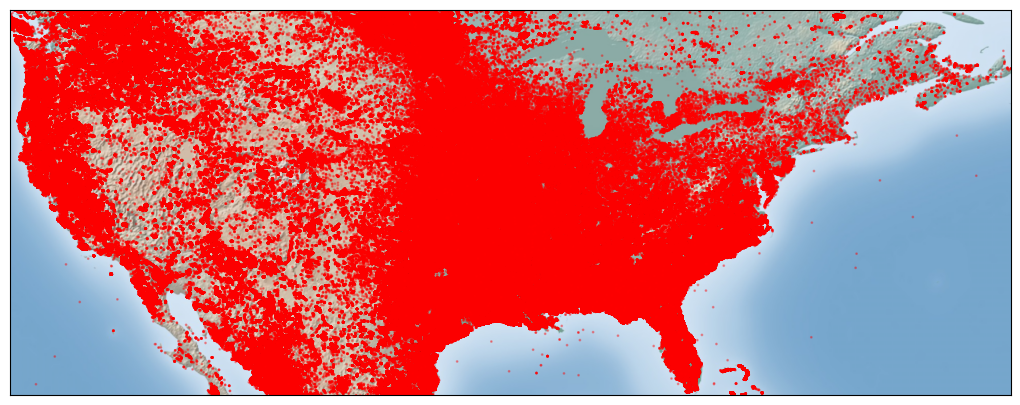

In [37]:
Fires.plot(points=data[data.Satellite=='NOAA 20'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

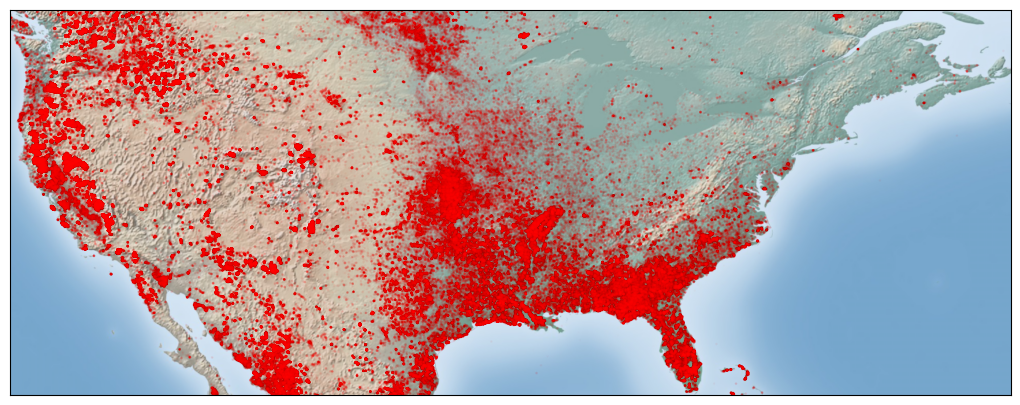

In [38]:
Fires.plot(points=data[data.Satellite=='GOES-EAST'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

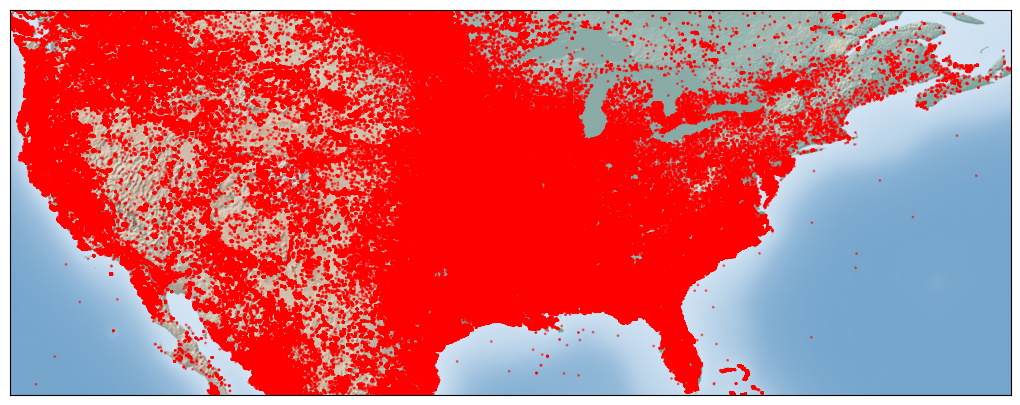

In [39]:
Fires.plot(points=data[data.Satellite=='SUOMI NPP'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

##Searchs by county or state

HMSFire provides bounding boxes of each US county and states and can be used in the following way.
Nota the these bounding boxes are taken from https://anthonylouisdagostino.com/bounding-boxes-for-all-us-counties/

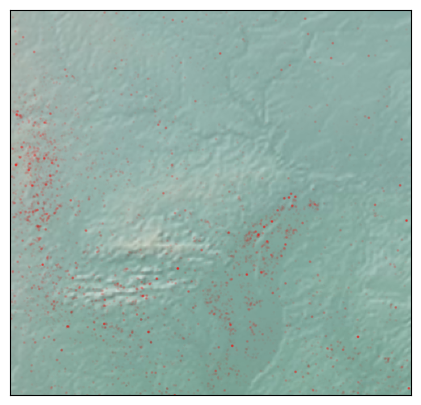

In [40]:
minlon, minlat, maxlon, maxlat = Fires.getBoundingBoxCounty(county='Dallas')
Fires.plot(minlon=minlon, minlat=minlat, maxlon=maxlon, maxlat=maxlat)

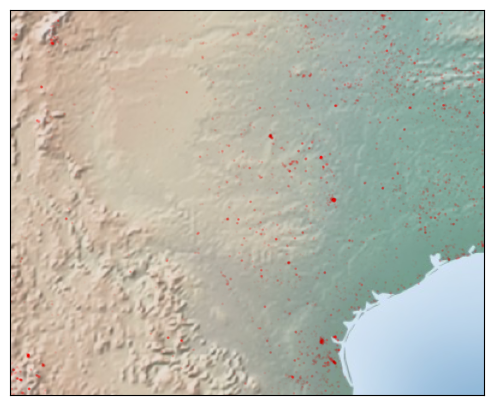

In [41]:
minlon, minlat, maxlon, maxlat = Fires.getBoundingBoxState(state='Texas')
Fires.plot(minlon=minlon, minlat=minlat, maxlon=maxlon, maxlat=maxlat)

##Frequence of Fire Radiative Power
More advanced methods can be don by means of masks, for instance get the distribution of FRP on Texas

Text(0.5, 0.98, 'Fire Radiative Power (FRP)')

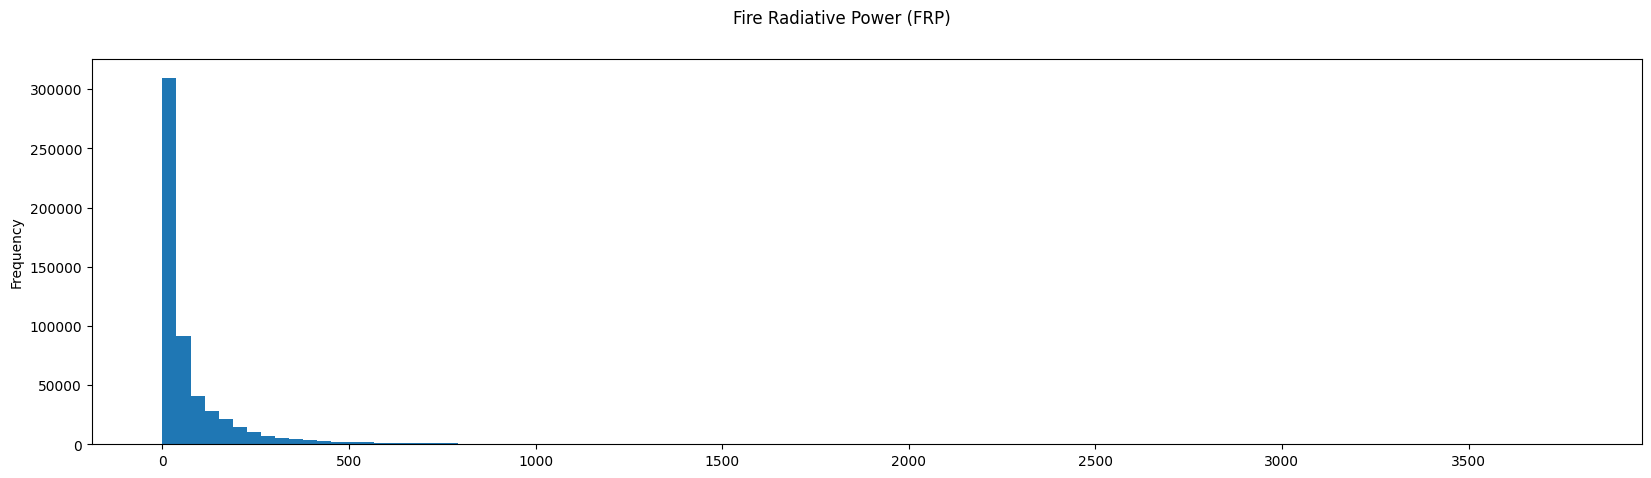

In [46]:
import matplotlib.pyplot as plt
minlon, minlat, maxlon, maxlat = Fires.getBoundingBoxState(state='Texas')
mask = (data.Lon>=minlon) & (data.Lat>=minlat) & (data.Lon<=maxlon) & (data.Lat<=maxlat)  & (data.FRP>=0)   #FRP=-999.0 are missing vaues..
dataTexas = data[mask]
dataTexas.FRP.plot.hist(bins=100)
plt.suptitle("Fire Radiative Power (FRP)")

##Resampling on time
We provide a method that allows resampling on time simple, the main difference with the method pandas.DataFrame.resample is that HMSFire provides flexibility on choosing the columns to be processed.

For instance, it is possible to do resampling on time with FRP's values and keeping the columns ['Lon', 'Lat', 'YearDay', 'Satellite', 'Method', 'Ecosystem'] in the following way:

In [43]:
Fires.resamplingTime(data=data[['Lon', 'Lat', 'YearDay', 'Satellite', 'Method', 'Ecosystem', 'Time', 'FRP']], freq='7D')

,Lon,Lat,YearDay,Satellite,Method,Ecosystem,Time,FRP
0,-169.973618,52.810310,2022194,NOAA 20,VIIRS,8,2022-07-13,4.464
1,-169.953979,52.822445,2020082,NOAA 20,VIIRS,53,2020-03-18,0.589
2,-169.947662,52.819252,2022183,SUOMI NPP,VIIRS,53,2022-06-29,9.437
3,-169.947632,52.823700,2021198,SUOMI NPP,VIIRS,53,2021-07-14,1.865
4,-169.947464,52.823151,2021141,NOAA 20,VIIRS,53,2021-05-19,0.591
...,...,...,...,...,...,...,...,...
7239249,-51.094212,69.234848,2020142,NOAA 20,VIIRS,53,2020-05-20,5.051
7239250,-51.089329,69.235504,2020142,NOAA 20,VIIRS,53,2020-05-20,2.318
7239251,-50.683819,66.996140,2022139,NOAA 20,VIIRS,53,2022-05-18,2.106
7239252,-50.446079,66.999184,2022200,MODIS TERRA,MODIS,53,2022-07-13,8.572


Note that this resampling only computes average values accoding the frequence of time. This previous example averaged seven days FRP's values.

Another example that considers a frequence of 30 days is the following: 

In [44]:
Fires.resamplingTime(data=data[['Lon', 'Lat', 'YearDay', 'Satellite', 'Method', 'Ecosystem', 'Time', 'FRP']], freq='30D')

,Lon,Lat,YearDay,Satellite,Method,Ecosystem,Time,FRP
0,-169.973618,52.810310,2022194,NOAA 20,VIIRS,8,2022-06-19,4.464
1,-169.953979,52.822445,2020082,NOAA 20,VIIRS,53,2020-03-01,0.589
2,-169.947662,52.819252,2022183,SUOMI NPP,VIIRS,53,2022-06-19,9.437
3,-169.947632,52.823700,2021198,SUOMI NPP,VIIRS,53,2021-06-24,1.865
4,-169.947464,52.823151,2021141,NOAA 20,VIIRS,53,2021-04-25,0.591
...,...,...,...,...,...,...,...,...
7237759,-51.094212,69.234848,2020142,NOAA 20,VIIRS,53,2020-04-30,5.051
7237760,-51.089329,69.235504,2020142,NOAA 20,VIIRS,53,2020-04-30,2.318
7237761,-50.683819,66.996140,2022139,NOAA 20,VIIRS,53,2022-04-20,2.106
7237762,-50.446079,66.999184,2022200,MODIS TERRA,MODIS,53,2022-07-19,8.572


As an alterantive HMSF allows resampling by taken Satellites, Methods, Ecosystems and YearDay columns as a group, and this can be done in the following way: 

In [32]:
Fires.resamplingTime(data=data[['Lon', 'Lat', 'Time', 'FRP']], freq='7D')

,Lon,Lat,Time,FRP
0,-161.685700,65.723885,2023-01-29,0.027
1,-156.813920,59.580143,2023-01-01,0.306
2,-155.201420,19.966003,2023-01-15,17.544
3,-151.105390,60.442352,2023-01-01,3.652
4,-151.103580,60.440773,2023-01-01,3.016
...,...,...,...,...
88687,-61.806690,17.628090,2023-01-22,3.439
88688,-61.530533,16.233824,2023-01-15,0.972
88689,-61.499138,16.448729,2023-01-29,2.400
88690,-61.033531,14.607785,2023-01-08,2.131


Resampling on time allows to create time-series which can be used for several machine learning applications.
For instance, we can plot a time-series of FRP's values that belongs to Texas.
Note that FRP's values are not allowed before to year 2021

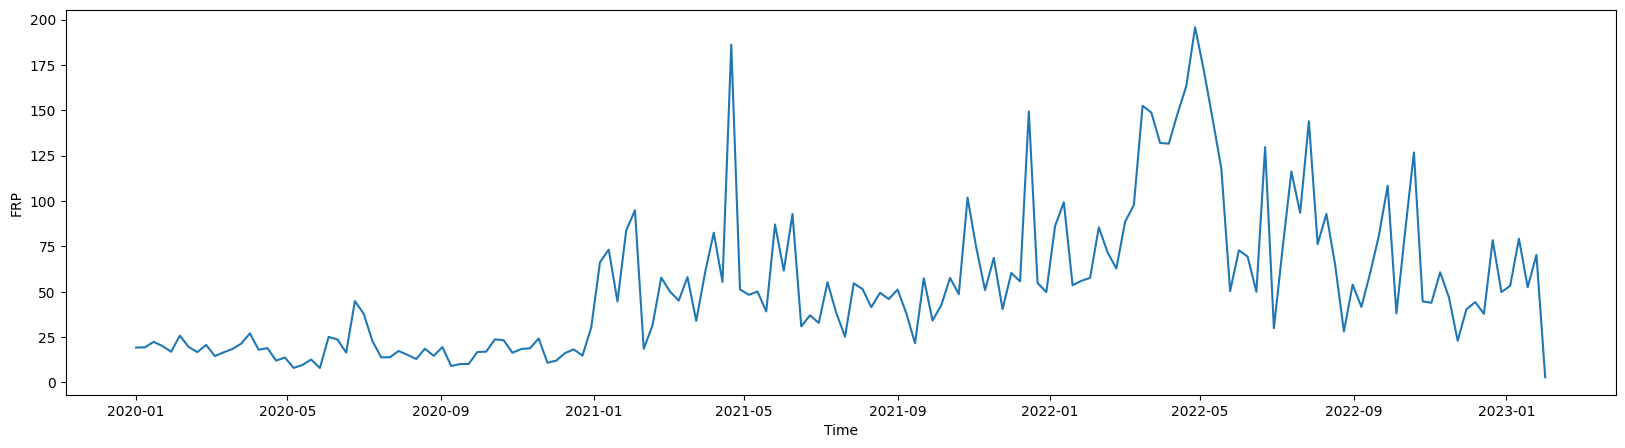

In [107]:
minlon, minlat, maxlon, maxlat = Fires.getBoundingBoxState(state='Texas')
mask = (data.Lon>=minlon) & (data.Lat>=minlat) & (data.Lon<=maxlon) & (data.Lat<=maxlat)  & (data.FRP>=0)   #FRP=-999.0 are missing vaues..
dataTexas = data[mask]
weekdata = Fires.resamplingTime(data=dataTexas[['Time', 'FRP']], freq='7D')
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(weekdata['Time'], weekdata['FRP'])
plt.xlabel('Time')
plt.ylabel('FRP')
#plt.xticks(size = 7)
plt.show()

Interpolated points

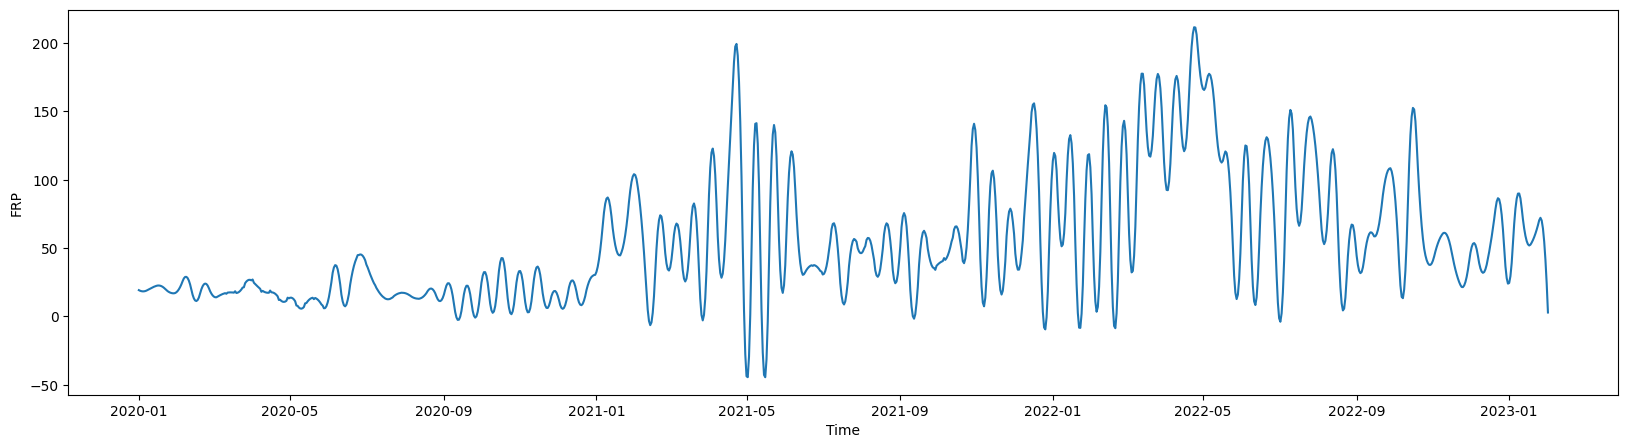

In [108]:
import pandas as pd
upsampled = weekdata.copy()
upsampled = upsampled.set_index('Time') 
upsampled = upsampled.resample('D')
interpolated = upsampled.interpolate(method='spline', order=2)
plt.plot(interpolated.index, interpolated['FRP'])
plt.xlabel('Time')
plt.ylabel('FRP')
#plt.xticks(size = 7)
plt.show()

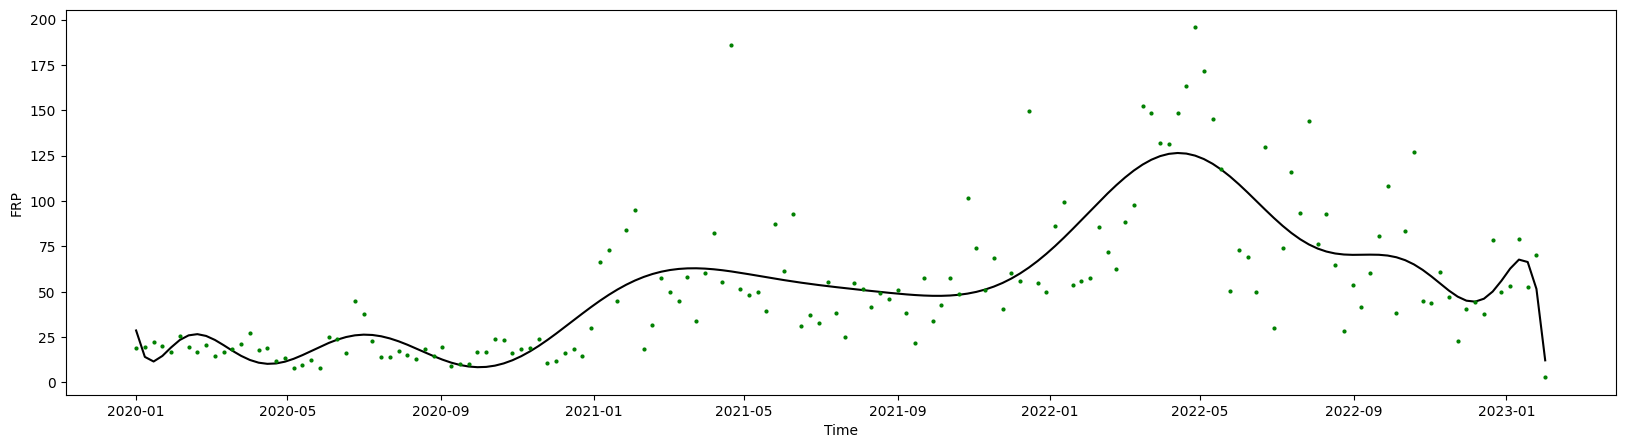

In [116]:
import pandas as pd
import numpy as np
time = weekdata.FRP.values
x = np.arange(time.size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
fit = np.polyfit(x, time, 15)
fit_fn = np.poly1d(fit)
plt.plot(weekdata['Time'], fit_fn(x), 'k-')
plt.plot(weekdata['Time'], weekdata['FRP'], 'go', ms=2)
#plt.plot(interpolated.index, interpolated['FRP'])
plt.xlabel('Time')
plt.ylabel('FRP')
#plt.xticks(size = 7)
plt.show()
